In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn import metrics
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

In [29]:
df = pd.read_csv("titanic.csv")


# visualization

* دي حاجات قديمة كنت بجربها 

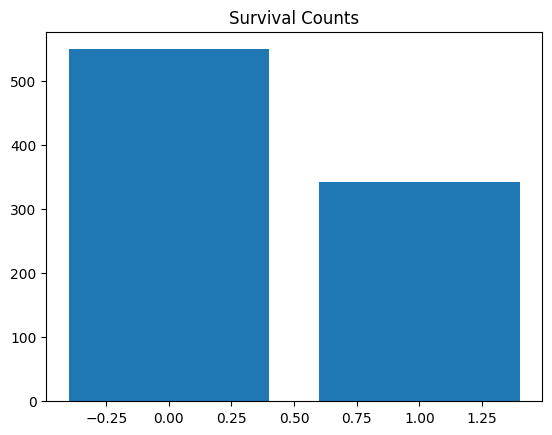

In [75]:
# 1 1.	Survival Analysis
plt.bar(df["Survived"].value_counts().index,df["Survived"].value_counts())
plt.title("Survival Counts")
plt.show()


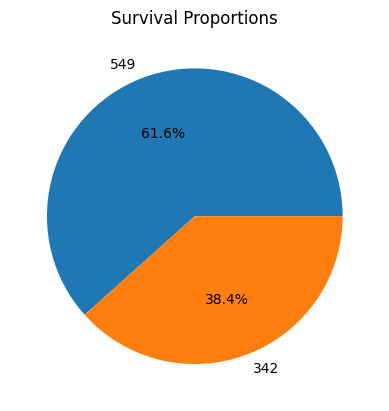

In [77]:
# 1 1.	Survival Analysis
plt.pie(df["Survived"].value_counts(),labels=df["Survived"].value_counts(),autopct="%1.1f%%")
plt.title("Survival Proportions")
plt.show()


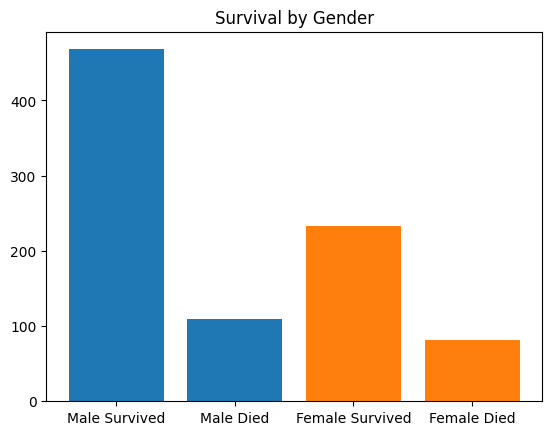

In [63]:
# 2.	Gender and Survival
male = df[df["Sex"] == "male"]["Survived"].value_counts()
female = df[df["Sex"] == "female"]["Survived"].value_counts()

plt.bar(["Male Survived", "Male Died"], male)
plt.bar(["Female Survived", "Female Died"], female)
plt.title("Survival by Gender")
plt.show()


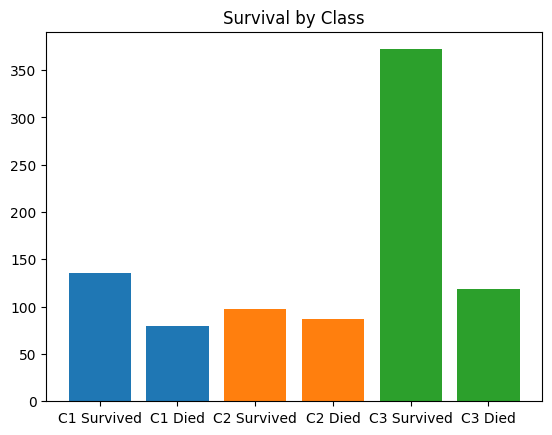

In [ ]:
# 3.	Class and Survival
class1 = df[df["Pclass"] == 1]["Survived"].value_counts()
class2 = df[df["Pclass"] == 2]["Survived"].value_counts()
class3 = df[df["Pclass"] == 3]["Survived"].value_counts()

plt.bar(["C1 Survived", "C1 Died"], class1)
plt.bar(["C2 Survived", "C2 Died"], class2)
plt.bar(["C3 Survived", "C3 Died"], class3)
plt.title("Survival by Class")
plt.show()


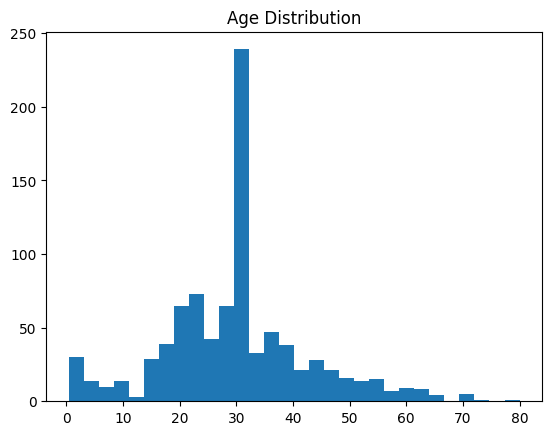

In [79]:
# 4.	Age Distribution
# o	Visualize the distribution of passenger ages with a histogram.

plt.hist(df["Age"].dropna(), bins=30)
plt.title("Age Distribution")
plt.show()


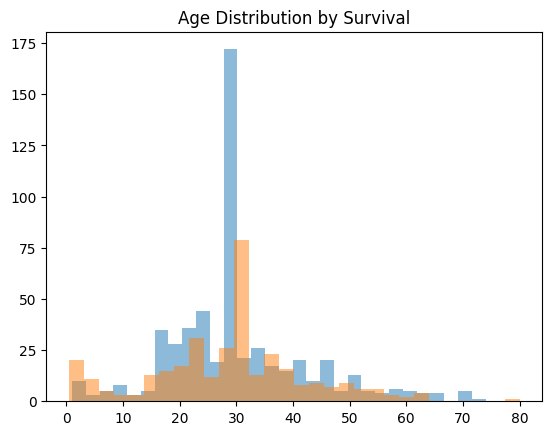

In [66]:
# 4 o	Overlay survival status (Survived) in the age histogram

plt.hist(df[df["Survived"] == 0]["Age"].dropna(), bins=30, alpha=0.5)
plt.hist(df[df["Survived"] == 1]["Age"].dropna(), bins=30, alpha=0.5)
plt.title("Age Distribution by Survival")
plt.show()



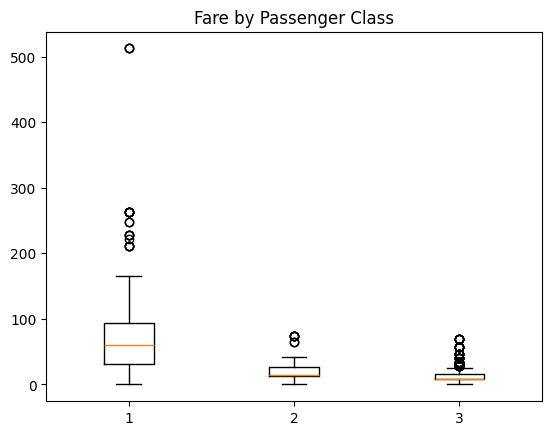

In [68]:
# 5.	Fare Analysis

plt.boxplot([df[df["Pclass"] == 1]["Fare"],df[df["Pclass"] == 2]["Fare"],df[df["Pclass"] == 3]["Fare"]])
plt.title("Fare by Passenger Class")
plt.show()



# preprocessing

In [17]:
df.info()
df.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 11 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          891 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Embarked     891 non-null    object 
dtypes: float64(2), int64(5), object(4)
memory usage: 76.7+ KB


,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,S


In [19]:
print(df.isnull().sum())

PassengerId    0
Survived       0
Pclass         0
Name           0
Age            0
SibSp          0
Parch          0
Ticket         0
Fare           0
Sex_male       0
Embarked_Q     0
Embarked_S     0
dtype: int64


In [32]:
df = df.drop(["Cabin"], axis=1)
#  حذفت العمود عشان الميسينج كتير 

In [33]:
df['Age'] = df['Age'].fillna(df['Age'].mean())
# (mod  الانسب )


In [34]:
df['Embarked'] = df['Embarked'].fillna(df['Embarked'].mode()[0])
# الميسينج 2 بس

In [35]:
print(df.isnull().sum())

PassengerId    0
Survived       0
Pclass         0
Name           0
Sex            0
Age            0
SibSp          0
Parch          0
Ticket         0
Fare           0
Embarked       0
dtype: int64


In [37]:
groups = df.Sex[df.Survived==1].value_counts()
print(groups)

Sex
female    233
male      109
Name: count, dtype: int64


In [38]:
g=df.groupby(["Sex","Pclass"])["Survived"].mean()
print(g)


Sex     Pclass
female  1         0.968085
        2         0.921053
        3         0.500000
male    1         0.368852
        2         0.157407
        3         0.135447
Name: Survived, dtype: float64


In [42]:
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,S


In [43]:
df = df.drop(['Name', 'Ticket'], axis=1)

#  الاعمدة دي مش مهمة وكمان محتاجة يتعملها اينودينج

In [44]:
# encoding Sex column
df['Sex'] = df['Sex'].map({'male': 0, 'female': 1})

In [45]:
df['Embarked'] = df['Embarked'].map({'C': 0, 'Q': 1, 'S': 2})

In [46]:
df.head()

,PassengerId,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,1,0,3,0,22.0,1,0,7.2500,2
1,2,1,1,1,38.0,1,0,71.2833,0
2,3,1,3,1,26.0,0,0,7.9250,2
3,4,1,1,1,35.0,1,0,53.1000,2
4,5,0,3,0,35.0,0,0,8.0500,2


# Logistic Regression

In [47]:
X = df.drop('Survived', axis=1)
y = df['Survived']

In [48]:
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=0.2,random_state=109)

In [52]:
logreg = LogisticRegression(max_iter=1000)
logreg.fit(X_train, y_train)


,penalty,'l2'
,dual,False
,tol,0.0001
,C,1.0
,fit_intercept,True
,intercept_scaling,1
,class_weight,None
,random_state,None
,solver,'lbfgs'
,max_iter,1000
,multi_class,'deprecated'


In [53]:
y_pred = logreg.predict(X_test)


Train Score: 0.8076
Test Score: 0.7989


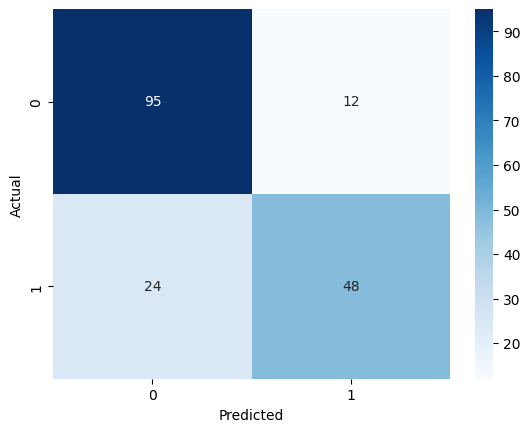

              precision    recall  f1-score   support

           0       0.80      0.89      0.84       107
           1       0.80      0.67      0.73        72

    accuracy                           0.80       179
   macro avg       0.80      0.78      0.78       179
weighted avg       0.80      0.80      0.80       179



In [55]:
train_score = logreg.score(X_train, y_train)
test_score = accuracy_score(y_test, y_pred)

print(f"Train Score: {train_score:.4f}")
print(f"Test Score: {test_score:.4f}")

# confusion_matrix 
cm = confusion_matrix(y_test, y_pred)
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()

# classification_report
print(classification_report(y_test, y_pred))